(113.13315062064096, 120.18631120901722, 35.72034910727458, 42.944454305892016)

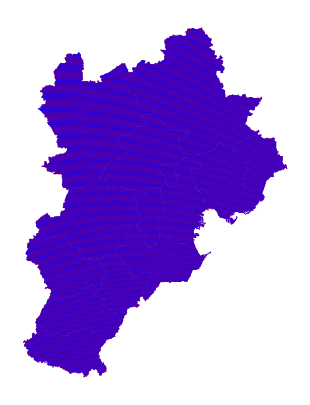

In [1]:
import geopandas as gpd
import h3pandas
import matplotlib.pyplot as plt

gdf = gpd.read_file('京津冀市级.json', encoding='utf-8')
ax = gdf.plot(figsize=(5, 5), color='red')
gdf_h3 = gdf.h3.polyfill_resample(7)
gdf_h3.plot(ax=ax, color='blue', figsize=(5, 5))
ax.axis("off")


In [2]:
import pandas as pd

temp_111 = gdf.h3.polyfill(7)
temp_111


,地名,区划码,地级,地级码,地级类,省级,省级码,省级类,ENG_NAME,code,...,VAR_NAME2,GID_2,TYPE_2,NAME_1,VAR_NAME1,GID_1,TYPE_1,year,geometry,h3_polyfill
0,保定市,130600,保定市,130600,地级市,河北省,130000,省,Baoding,130600,...,Bǎo Dìng,130600,Prefecture City,Hebei,Hé Běi,130000,Province,2022,"POLYGON ((116.24013 39.51643, 116.24024 39.516...","[87318035cffffff, 8731804e0ffffff, 87318568aff..."
1,北京市,110000,不统计,0,不统计,北京市,110000,直辖市,Beijing,110000,...,NULL,0,NULL,Beijing,Běi Jīng,110000,Municipality,2022,"POLYGON ((117.38335 40.22647, 117.38089 40.225...","[8731aa8b1ffffff, 8731aacf6ffffff, 8731a849bff..."
2,沧州市,130900,沧州市,130900,地级市,河北省,130000,省,Cangzhou,130900,...,Cāng Zhōu,130900,Prefecture City,Hebei,Hé Běi,130000,Province,2022,"POLYGON ((116.20296 38.92101, 116.20072 38.922...","[87318841dffffff, 87318e041ffffff, 87318ecd4ff..."
3,承德市,130800,承德市,130800,地级市,河北省,130000,省,Chengde,130800,...,Chéng Dé,130800,Prefecture City,Hebei,Hé Běi,130000,Province,2022,"POLYGON ((119.23294 41.31080, 119.22739 41.311...","[8731a8b82ffffff, 8731a10c8ffffff, 8731acb61ff..."
4,邯郸市,130400,邯郸市,130400,地级市,河北省,130000,省,Handan,130400,...,Hán Dān,130400,Prefecture City,Hebei,Hé Běi,130000,Province,2022,"POLYGON ((115.47242 36.75102, 115.46940 36.750...","[87319e35effffff, 87319e212ffffff, 87319e192ff..."
5,衡水市,131100,衡水市,131100,地级市,河北省,130000,省,Hengshui,131100,...,Héng Shuǐ,131100,Prefecture City,Hebei,Hé Běi,130000,Province,2022,"POLYGON ((116.32962 37.58047, 116.32990 37.580...","[8731832f4ffffff, 87318e69affffff, 87319c352ff..."
6,廊坊市,131000,廊坊市,131000,地级市,河北省,130000,省,Langfang,131000,...,Láng Fáng,131000,Prefecture City,Hebei,Hé Běi,130000,Province,2022,"MULTIPOLYGON (((117.20336 40.08096, 117.20213 ...","[873181210ffffff, 87318c903ffffff, 8731812ebff..."
7,秦皇岛市,130300,秦皇岛市,130300,地级市,河北省,130000,省,Qinhuangdao,130300,...,Qín Huáng Dǎo,130300,Prefecture City,Hebei,Hé Běi,130000,Province,2022,"POLYGON ((119.15209 40.61280, 119.15084 40.612...","[873030cebffffff, 873036771ffffff, 87303678dff..."
8,石家庄市,130100,石家庄市,130100,地级市,河北省,130000,省,Shijiazhuang,130100,...,Shí Jiā Zhuāng,130100,Prefecture City,Hebei,Hé Běi,130000,Province,2022,"POLYGON ((113.82422 38.75805, 113.81676 38.758...","[8731822c9ffffff, 87318254effffff, 87319cda4ff..."
9,唐山市,130200,唐山市,130200,地级市,河北省,130000,省,Tangshan,130200,...,Táng Shān,130200,Prefecture City,Hebei,Hé Běi,130000,Province,2022,"MULTIPOLYGON (((118.56158 40.28313, 118.55937 ...","[8731aba71ffffff, 8731ab78dffffff, 873036103ff..."


In [3]:
temp1 = set()
for i in range(len(temp_111)):
  for j in temp_111['h3_polyfill'][i]:
    temp1.add(j)
file_name = "京津冀市级结果.csv"
pd.DataFrame(temp1).to_csv(file_name, index=False)


In [4]:
import h3

convert = set()
for i in temp1:
    convert.add(h3.h3_to_parent(i))

pd.DataFrame(list(convert)).to_csv("京津冀市级转换结果.csv", index=False)
